In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

In [2]:
#Create a set of random lat and long combos
lats=np.random.uniform(low=-90, high=90, size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#Add lats and lngs to list
coordinates=list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
#Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count=1
    #Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #Add 1 to record count
    record_count+=1
    
#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve the data
        city_weather=requests.get(city_url).json()
        #Prase out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information to the city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tchollire
Processing Record 2 of Set 1 | san borja
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | nha trang
Processing Record 5 of Set 1 | odweyne
Processing Record 6 of Set 1 | sangin
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | jabiru
City not found. Skipping...
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | geraldton
Processing Record 22 of Set 1 | cape town
Processing R

Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | sudak
Processing Record 41 of Set 4 | barberton
Processing Record 42 of Set 4 | luderitz
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | muborak
Processing Record 46 of Set 4 | mangaluru
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | nanhai
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 5 | tawnat
City not found. Skipping...
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | plouzane
Processing Record 5 of Set 5 | ginda
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | esmeraldas
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | talara
Processing Record 11 of Set 5 | scottsbluff
Processing R

City not found. Skipping...
Processing Record 29 of Set 8 | boksitogorsk
Processing Record 30 of Set 8 | kasempa
Processing Record 31 of Set 8 | cherskiy
Processing Record 32 of Set 8 | peleduy
Processing Record 33 of Set 8 | neryungri
Processing Record 34 of Set 8 | sheridan
Processing Record 35 of Set 8 | matara
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 38 of Set 8 | ciras
City not found. Skipping...
Processing Record 39 of Set 8 | ostersund
Processing Record 40 of Set 8 | tanout
Processing Record 41 of Set 8 | eha amufu
Processing Record 42 of Set 8 | sabang
Processing Record 43 of Set 8 | kimbe
Processing Record 44 of Set 8 | hajnowka
Processing Record 45 of Set 8 | sobolevo
Processing Record 46 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 47 of Set 8 | acari
Processing Record 48 of Set 8 | pitimbu
Processing Record 49 of Set 8 | porto torres
Processing Record 50 of Set 8 |

Processing Record 17 of Set 12 | bubaque
Processing Record 18 of Set 12 | diamantino
Processing Record 19 of Set 12 | lerwick
Processing Record 20 of Set 12 | den helder
Processing Record 21 of Set 12 | mecca
Processing Record 22 of Set 12 | nguiu
City not found. Skipping...
Processing Record 23 of Set 12 | kleck
City not found. Skipping...
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | acarau
Processing Record 26 of Set 12 | oranjemund
Processing Record 27 of Set 12 | san jeronimo
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 30 of Set 12 | honiara
Processing Record 31 of Set 12 | shingu
Processing Record 32 of Set 12 | oyama
Processing Record 33 of Set 12 | humaita
Processing Record 34 of Set 12 | erdenet
Processing Record 35 of Set 12 | turayf
Processing Record 36 of Set 12 | santa cruz
Processing Record 37 of Set 12 | micheweni
Processing Record 38 of Set 12 

In [7]:
#Convert the array of dictionaries to a Pandas Dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tchollire,8.4022,14.1698,70.05,95,85,3.47,CM,2021-08-07 20:30:45
1,San Borja,-14.8167,-66.8500,92.14,24,0,4.85,BO,2021-08-07 20:30:46
2,Saint George,37.1041,-113.5841,98.64,11,1,1.99,US,2021-08-07 20:28:20
3,Nha Trang,12.2500,109.1833,84.20,74,100,5.79,VN,2021-08-07 20:29:08
4,Odweyne,9.4092,45.0640,78.76,43,81,17.47,SO,2021-08-07 20:30:46
5,Sangin,32.0728,64.8359,85.42,12,0,2.95,AF,2021-08-07 20:30:47
6,Saskylakh,71.9167,114.0833,50.86,74,100,9.06,RU,2021-08-07 20:30:47
7,Lompoc,34.6391,-120.4579,82.22,65,1,14.97,US,2021-08-07 20:30:48
8,Pevek,69.7008,170.3133,41.95,74,27,4.85,RU,2021-08-07 20:30:48
9,Ribeira Grande,38.5167,-28.7000,72.00,60,40,8.05,PT,2021-08-07 20:30:49


In [8]:
#Reorder columns
new_column_order=["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tchollire,CM,2021-08-07 20:30:45,8.4022,14.1698,70.05,95,85,3.47
1,San Borja,BO,2021-08-07 20:30:46,-14.8167,-66.8500,92.14,24,0,4.85
2,Saint George,US,2021-08-07 20:28:20,37.1041,-113.5841,98.64,11,1,1.99
3,Nha Trang,VN,2021-08-07 20:29:08,12.2500,109.1833,84.20,74,100,5.79
4,Odweyne,SO,2021-08-07 20:30:46,9.4092,45.0640,78.76,43,81,17.47


In [9]:
#Create output file (CSV)
output_data_file="weather_data/cities.csv"

#Export the data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
#Extract relevant fields from the DF for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

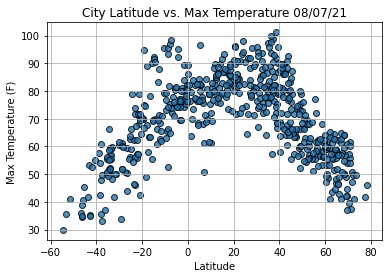

In [11]:
#Import time module
import time

#Build scatterplot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph props
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

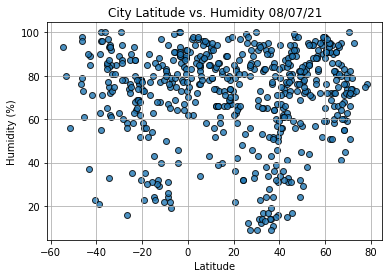

In [12]:
#Import time module
import time

#Build scatterplot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph props
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

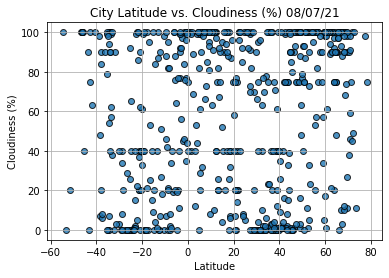

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

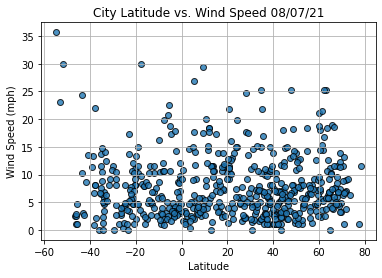

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
#Import linear regress
from scipy.stats import linregress

#Create a function to perform linear regression and plot regression line
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err)=linregress(x_values, y_values)
    
    #Calculate the regression line
    regress_values=x_values*slope + intercept
    #Get line equation
    line_eq="y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitute')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
#Create northern & southern hemisphere df
northern_hemi_df=city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tchollire,CM,2021-08-07 20:30:45,8.4022,14.1698,70.05,95,85,3.47
2,Saint George,US,2021-08-07 20:28:20,37.1041,-113.5841,98.64,11,1,1.99
3,Nha Trang,VN,2021-08-07 20:29:08,12.2500,109.1833,84.20,74,100,5.79
4,Odweyne,SO,2021-08-07 20:30:46,9.4092,45.0640,78.76,43,81,17.47
5,Sangin,AF,2021-08-07 20:30:47,32.0728,64.8359,85.42,12,0,2.95


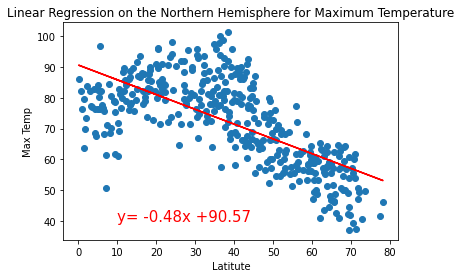

In [57]:
# Linear regression on Northern hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

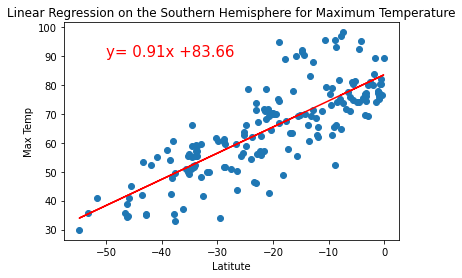

In [38]:
# Linear regression on Northern hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

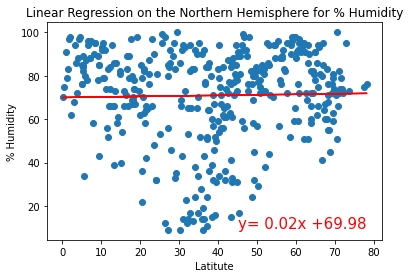

In [50]:
# Linear regression on Northern hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45,10))

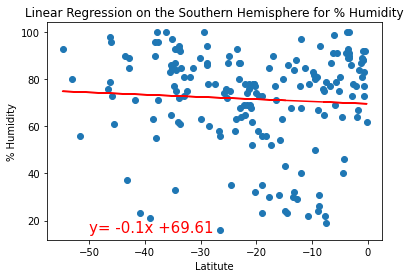

In [52]:
# Linear regression on Southern hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

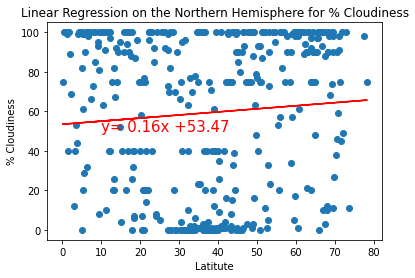

In [62]:
# Linear regression on Northern hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,50))

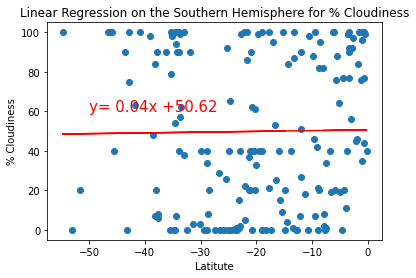

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

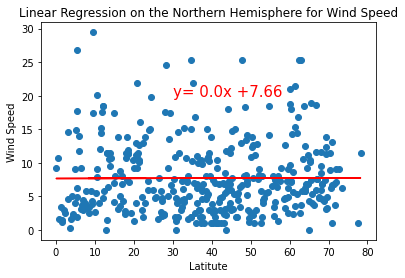

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(30,20))

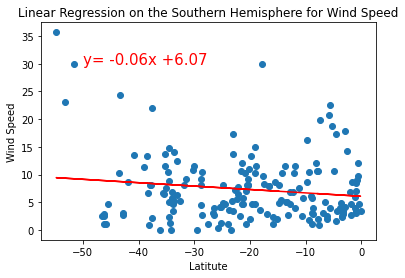

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))